-28.2144288138


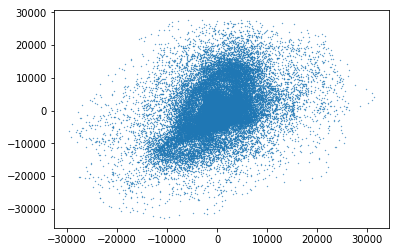

In [65]:
import numpy as np
import scipy.io.wavfile
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

%matplotlib inline  

sr, smp = scipy.io.wavfile.read('piano1-eb3.wav')

# smp = np.copysign(np.log10(np.abs(smp)), smp)
# smp = np.cbrt(smp)

def ahead(a, offset):
    a[:-offset] = a[offset:]

l, r = map(np.array, zip(*smp))
ahead(l, 10)

plt.scatter(l, r, s=0.1)
# plt.plot(l, r, linewidth=.5)

print(np.mean(l*r))

In [120]:
# piano eb3

from global_util import *
import itertools
sys.path.append(r'C:\Users\jimbo1qaz\encrypted\code\n163')
import gauss

eb3 = al(I(wave) for wave in
         '''11 9 9 14 15 15 15 15 14 13 13 12 12 12 14 13 7 4 6 8 8 8 7 7 6 5 4 3 3 3 2 0 5 10 9 6 4 1 0 1 1 5 8 8 4 0 2 9 ;
9 10 13 14 15 15 14 13 14 11 7 10 12 10 6 4 3 6 9 9 9 11 12 11 9 6 6 6 4 2 3 6 8 6 4 2 1 1 0 0 3 7 5 0 0 4 7 9 ;
8 10 11 13 15 15 13 15 15 12 9 11 13 12 8 5 5 8 10 11 11 13 15 13 11 11 11 10 7 7 10 11 12 10 7 5 5 2 0 4 8 5 1 0 2 5 5 6 ;
9 12 12 12 14 15 14 12 11 12 14 12 9 6 5 7 8 7 8 11 13 12 10 11 11 9 8 7 7 9 11 10 8 8 7 4 1 1 4 5 2 0 0 0 1 3 3 4 ;
9 10 10 12 14 15 14 12 11 12 13 13 9 7 7 7 7 7 9 12 12 12 13 13 12 11 10 8 10 12 11 11 11 11 7 3 2 4 4 3 2 0 0 1 2 2 4 6 ;
9 10 10 12 15 15 14 13 12 13 14 13 10 8 8 7 6 7 10 12 12 13 14 14 14 13 11 10 10 11 11 10 11 11 7 3 2 2 3 3 2 0 0 0 1 2 3 6'''
         .split(';')
        )[I('2 2 3 3 4 4 5')]

wakana = list(map(I,
                 '''5 8 10 11 10 11 12 9 9 9 7 9 11 14 15 12 10 8 6 4 2 0 0 1 2 1 1 2 3 3 5 5 ;
7 9 9 9 9 9 8 7 6 6 6 7 11 15 15 12 10 9 8 7 6 4 2 1 0 1 1 2 1 2 2 1 ;
2 4 6 6 7 8 8 7 7 7 7 7 8 13 15 13 11 9 7 7 6 5 4 2 0 0 1 0 0 3 2 1 ;
3 4 5 6 7 8 7 7 8 9 6 7 11 15 15 14 13 11 10 8 8 6 2 1 1 0 0 1 2 1 1 2 ;
3 3 4 7 5 4 7 8 6 4 7 11 14 15 15 14 12 10 10 10 7 4 3 2 0 0 1 1 1 0 1 2'''.split(';')))

while len(wakana) < len(eb3):
    print('...')
    wakana.append(wakana[-1])

    
def rms(*xs):
    pass
    
def merge(*waves):
    ffts = [np.fft.rfft(wave) for wave in waves]
    
    outs = []
    for coeffs in itertools.zip_longest(*ffts, fillvalue=0j):
#         print(coeffs)
        mag = np.mean([np.abs(coeff) for coeff in coeffs])
        arg = np.mean([np.angle(coeff) for coeff in coeffs])
        outs.append(mag * np.exp(1j * arg))
    
    wave_out = np.fft.irfft(outs)
    return gauss.rescale_quantize(wave_out)


new = [merge(e, w) for e, w in zip(eb3, wakana)]
print(';\n'.join(S(wave) for wave in new))

...
...
10 11 10 10 12 12 10 12 12 11 9 9 9 8 5 4 6 9 9 10 13 15 15 12 9 9 10 10 6 3 4 5 5 4 3 1 1 0 0 0 2 3 3 1 1 2 3 5;
11 12 10 12 14 13 11 12 14 12 9 8 8 9 8 5 4 7 12 15 14 14 15 15 12 10 10 10 10 9 7 7 9 8 5 2 0 0 0 2 4 3 3 1 1 2 2 5;
9 9 9 10 11 13 14 13 10 9 10 11 9 7 7 7 7 7 10 13 15 15 15 15 13 12 10 7 7 10 10 7 6 6 5 3 0 0 1 2 2 2 1 1 2 2 1 5;
8 7 7 10 13 14 12 10 11 11 11 9 8 8 7 6 6 8 11 13 15 14 14 15 14 10 10 10 9 9 9 8 7 5 3 1 0 1 3 3 1 2 3 1 0 1 4 7;
9 9 8 10 11 12 10 9 9 11 12 10 7 5 5 7 9 10 13 15 15 15 15 15 14 12 11 11 11 10 10 9 7 7 5 1 0 1 2 2 2 1 1 1 2 3 4 5;
9 9 8 10 11 12 10 9 9 11 12 10 7 5 5 7 9 10 13 15 15 15 15 15 14 12 11 11 11 10 10 9 7 7 5 1 0 1 2 2 2 1 1 1 2 3 4 5;
8 8 8 9 11 11 9 8 9 11 11 10 7 5 5 7 8 10 13 15 15 15 15 15 14 13 11 11 10 10 9 8 7 7 4 1 0 0 2 2 1 1 1 0 1 3 3 5


In [95]:
# piano g4
waves = [I(x) for x in '''9 10 11 10 8 6 5 5 5 7 9 10 9 7 7 9 10 7 10 15 13 5 1 2 3 0 0 3 8 10 11 9 ;
11 12 14 14 11 9 10 14 15 14 12 13 12 9 8 11 14 14 13 10 8 6 5 2 0 0 2 5 8 10 10 10 ;
10 13 15 13 11 12 13 13 13 14 15 14 12 9 8 10 12 12 11 10 10 9 7 3 1 0 0 2 5 8 8 8 ;
10 12 12 13 13 13 12 11 13 15 15 14 12 10 10 11 11 11 11 11 11 10 10 7 3 0 0 3 4 4 4 7 ;
9 11 13 14 13 11 11 13 15 15 14 13 11 10 10 10 11 10 10 12 13 11 6 2 1 1 0 0 0 2 4 6 ;
13 13 11 12 13 14 15 15 15 15 13 12 12 11 9 8 10 12 13 11 9 6 4 3 1 0 0 1 1 2 5 10 ;
9 10 10 12 13 14 14 14 15 15 14 10 9 10 11 11 11 12 12 10 7 6 5 3 0 0 0 1 3 6 8 9 ;
6 7 9 11 14 15 15 14 12 11 12 12 12 12 12 12 11 11 11 11 10 6 2 1 2 2 0 0 2 4 6 6 ;
9 13 13 12 12 14 15 15 14 12 12 13 14 15 15 14 12 11 11 10 6 3 1 1 1 1 0 1 0 0 0 3 
'''.split(';')]

xs = [i*2//3 for i in range(48)]
new = [wave[xs] for wave in waves]
print(';\n'.join(S(wave) for wave in new))

9 9 10 11 11 10 8 8 6 5 5 5 5 5 7 9 9 10 9 9 7 7 7 9 10 10 7 10 10 15 13 13 5 1 1 2 3 3 0 0 0 3 8 8 10 11 11 9;
11 11 12 14 14 14 11 11 9 10 10 14 15 15 14 12 12 13 12 12 9 8 8 11 14 14 14 13 13 10 8 8 6 5 5 2 0 0 0 2 2 5 8 8 10 10 10 10;
10 10 13 15 15 13 11 11 12 13 13 13 13 13 14 15 15 14 12 12 9 8 8 10 12 12 12 11 11 10 10 10 9 7 7 3 1 1 0 0 0 2 5 5 8 8 8 8;
10 10 12 12 12 13 13 13 13 12 12 11 13 13 15 15 15 14 12 12 10 10 10 11 11 11 11 11 11 11 11 11 10 10 10 7 3 3 0 0 0 3 4 4 4 4 4 7;
9 9 11 13 13 14 13 13 11 11 11 13 15 15 15 14 14 13 11 11 10 10 10 10 11 11 10 10 10 12 13 13 11 6 6 2 1 1 1 0 0 0 0 0 2 4 4 6;
13 13 13 11 11 12 13 13 14 15 15 15 15 15 15 13 13 12 12 12 11 9 9 8 10 10 12 13 13 11 9 9 6 4 4 3 1 1 0 0 0 1 1 1 2 5 5 10;
9 9 10 10 10 12 13 13 14 14 14 14 15 15 15 14 14 10 9 9 10 11 11 11 11 11 12 12 12 10 7 7 6 5 5 3 0 0 0 0 0 1 3 3 6 8 8 9;
6 6 7 9 9 11 14 14 15 15 15 14 12 12 11 12 12 12 12 12 12 12 12 12 11 11 11 11 11 11 10 10 6 2 2 1 2 2 2 0 0 0 2 2 4 6 6 6;
9 9

In [116]:
# zunpet with gap
waves = [I(x) for x in '''8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 10 15 15 15 ;
8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 15 15 15 ;
8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 15 15 15 ;
8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 10 15 15 ;
8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 15 15 ;
7 8 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 15 15
'''.split(';')]

def lpf(wave, cutoff, ratio):
    fft = np.fft.rfft(wave)
    fft[6:10] *= ratio
    wave_out = np.fft.irfft(fft)
    return gauss.rescale_quantize(wave_out)
    
new = [lpf(wave, 6, 2/3) for wave in waves]
print(';\n'.join(S(wave) for wave in new))

8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 10 14 15 15;
8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 8 15 15 15;
9 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 15 14 15;
9 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 10 15 15;
9 9 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 6 15 15;
8 10 2 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 15 15


In [117]:
# zunpet blaring
waves = [I(x) for x in '''8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 10 15 15 15 ;
8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 15 15 15 ;
8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 15 15 15 ;
8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 10 15 15 ;
8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 15 15 ;
7 8 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 15 15
'''.split(';')]

def lpf(wave):
    fft = np.fft.rfft(wave)
    fft[6:8] *= 2/3
    fft[10:] *= 4/3
    wave_out = np.fft.irfft(fft)
    return gauss.rescale_quantize(wave_out)
    
new = [lpf(wave) for wave in waves]
print(';\n'.join(S(wave) for wave in new))

7 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 10 14 14 15;
8 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 8 15 14 15;
8 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 15 14 15;
8 10 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 11 15 15;
8 10 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 5 15 15;
6 10 2 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 2 0 15 15


In [107]:
# high zunpet
waves = [I(x) for x in '''8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 10 15 15 15 ;
8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 15 15 15 ;
8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 15 15 15 ;
8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 10 15 15 ;
8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 15 15 ;
7 8 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 15 15
'''.split(';')]

def lpf(wave):
    fft = np.fft.rfft(wave)
    fft[10:] = 0
    wave_out = np.fft.irfft(fft)
    return gauss.rescale_quantize(wave_out)
    
new = [lpf(wave) for wave in waves]
print(';\n'.join(S(wave) for wave in new))

10 6 2 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 2 9 15 15 13;
10 6 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 7 14 15 13;
9 6 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 3 12 15 13;
10 6 2 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 2 10 15 15;
11 6 2 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 7 14 15;
11 6 4 2 0 1 2 1 1 2 1 1 2 2 1 1 2 1 1 2 1 1 1 2 1 1 2 1 0 5 13 15
